In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [8]:
wh = pd.read_csv('C:/Users/dz234/OneDrive/Desktop/Learning Process/Applied Data Science/2017.csv')

In [9]:
wh.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [10]:
# understand dataset 
wh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

     Happiness.Score  Economy..GDP.per.Capita.    Family  \
0              7.537                  1.616463  1.533524   
1              7.522                  1.482383  1.551122   
2              7.504                  1.480633  1.610574   
3              7.494                  1.564980  1.516912   
4              7.469                  1.443572  1.540247   
..               ...                       ...       ...   
150            3.471                  0.368746  0.945707   
151            3.462                  0.777153  0.396103   
152            3.349                  0.511136  1.041990   
153            2.905                  0.091623  0.629794   
154            2.693                  0.000000  0.000000   

     Health..Life.Expectancy.   Freedom  Generosity  \
0                    0.796667  0.635423    0.362012   
1                    0.792566  0.626007    0.355280   
2                    0.833552  0.627163    0.475540   
3                    0.858131  0.620071    0.290549   
4   

<AxesSubplot:>

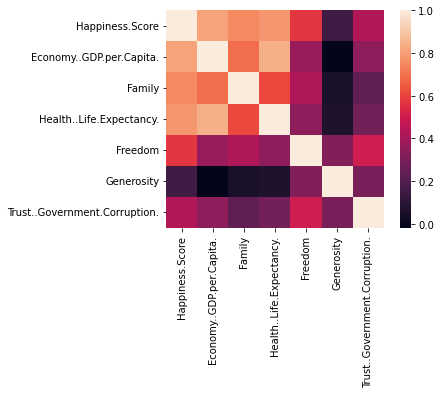

In [24]:
wh1 = wh.iloc[:,[2,5,6,7,8,9,10]]
print(wh1)
cor = wh1.corr()

sns.heatmap(cor, square = True)

In [14]:
# scalling the dataset 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = wh.iloc[:, [5,10]].values #econonomy GDP vs Trust Gov Corruption # just for practice used 2 
XX = ss.fit_transform(X)
XX

array([[ 1.50618765,  1.90308437],
       [ 1.18651768,  2.73999784],
       [ 1.1823454 ,  0.30006609],
       [ 1.38344191,  2.40680857],
       [ 1.09398544,  2.56079976],
       [ 1.23792427,  1.57444226],
       [ 1.17893937,  1.62092002],
       [ 1.00370674,  2.56282438],
       [ 1.21513788,  2.57843667],
       [ 1.19136213,  1.75722637],
       [ 0.93141005, -0.37380164],
       [ 0.29799288, -0.22711087],
       [ 1.19775726,  0.96652596],
       [ 1.3388096 ,  0.12353995],
       [ 1.31365029,  1.72963811],
       [ 1.19972687,  1.51592295],
       [ 1.14216675,  1.26537256],
       [ 1.80535433,  1.93141289],
       [ 1.08936495,  1.40437027],
       [ 0.63911598, -0.40295446],
       [ 1.5297437 ,  1.98722085],
       [ 0.29238275, -0.11869343],
       [ 0.87728922, -0.85113462],
       [ 0.47821036, -0.62547117],
       [ 0.40165073,  0.09526981],
       [ 1.6869423 ,  3.36702216],
       [ 0.85487202,  0.29552172],
       [ 0.55513378,  0.54219374],
       [-0.26873475,

C:\Users\dz234\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


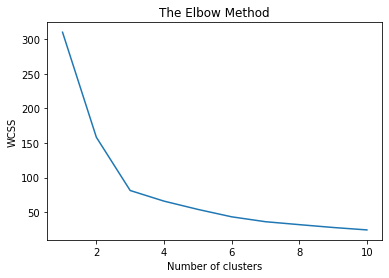

In [16]:
# find number of cluster, K 
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
    kmeans.fit(XX) # using dataset after scalled 
    wcss.append(kmeans.inertia_) #inertia is the wcss value 
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(XX)
y_kmeans

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2])

C:\Users\dz234\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

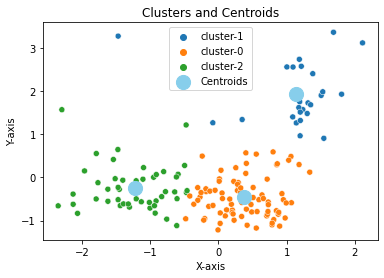

In [20]:
# visualizing K- Means Clustering 
sns.scatterplot(XX[:,0], XX[:,1], hue =['cluster-{}'.format(x) for x in y_kmeans])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200, c ='skyblue', label = 'Centroids')
plt.title('Clusters and Centroids')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show

In [22]:
# check score 
score = silhouette_score(XX, kmeans.labels_, metric = 'euclidean')
print(score)

0.49765562338026487
